<font color = 'brown'  size = 3>
    
# Espectro Mossbauer

El siguiente programa permite obtener el espectro Mossbauer de compuestos que contienen hierro.

Para construir el espectro será necesario conocer el valor del despalazamiento isomérico ($\delta$) y el desdoblamiento cuadrupolar ($\Delta E_{Q}$) correspondientes al compuesto utilizado, es decir, los parámetros Mossbauer del compuesto.

Para realizar el espectro se considerará la información generada en el output de ORCA, éste archivo contiene el valor de la densidad electrónica ($\rho_{0}$) y el valor del desdoblamiento cuadrupolar ($\Delta E_{Q}$), así que será necesario determinar el valor del desplazamiento isomérico ($\delta$) de acuerdo a la relación lineal:

$$\delta = \alpha (\rho_{0} - C ) + \beta$$.

Donde los valores de $\alpha$, $C$ y $\beta$ son: $\alpha = -0.3612$, $C = 11810$ y $\beta = 2.830$.

El ancho natural de la linea Moessbauer es de $w = 0.194 \frac{mm}{seg}$, sin embargo el valor $w = 0.39 \frac{mm}{s}$ también podría ser un buen valor para las simulaciones.

Se propone una absorción del 5%, esto significa que el mínimo de las curvas debe estar alrededor del 95% en en la gráfica. Para lograr esto hay que modificar el parámetro $I$ que corresponde al ajuste de la intensidad.

Escribe el valor de la densidad electrónica del compuesto
None11816.360487498
Escribe el valor del desdoblamiento cuadrupolar
None-0.644


El valor del desplazamiento isomérico es:  0.5325919157226884 mm/s
El valor del desdoblamiento cuadrupolar es:  -0.644 mm/s


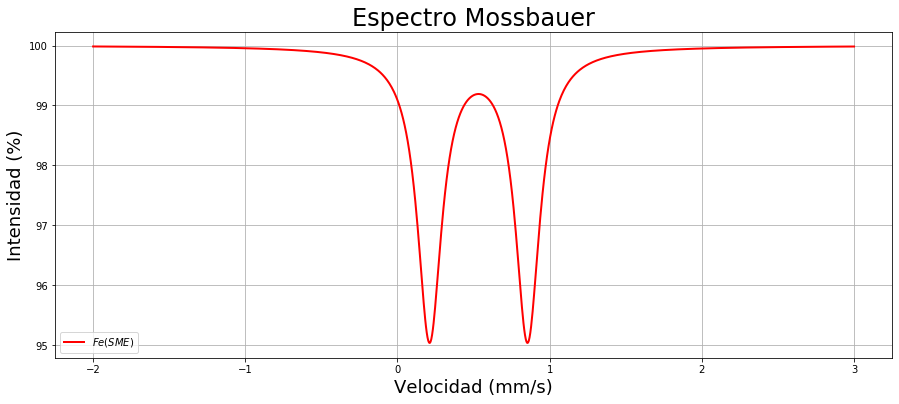

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Función que genera el ajuste Loretziano.
def Ajuste(w, x, IS, QS, I):
    denominador_1 = (x - IS - QS / 2) ** 2 + (w / 2) ** 2
    denominador_2 = (x - IS + QS / 2) ** 2 + (w / 2) ** 2
    Lorentziana = 100 -(I * w / 2 * np.pi) * ((1 / denominador_1) + (1 / denominador_2))
    return Lorentziana 

# Definimos los parámetros necesarios.
          
x = np.linspace(-2, 3, 1000)       # Rango de valores en el eje horizontal.
w = 0.194                           # Ancho natural de la línea Mossbauer.
I = 0.15                           # Parámetro de ajuste de la intensidad.

alpha = -0.3612                    # Valores para la obtención del desplazamineto isomérico.
beta = 2.830
C = 11810

# Valor de la densidad electrónica dada en el output de ORCA.
rho = float(input(print("Escribe el valor de la densidad electrónica del compuesto")))
IS = alpha * (rho - C) + beta      # Valor del desplazamiento isomérico (Isomer Shift)

# Valor del desdoblamiento cuadrupolar (Quadrupole Splitting) dado en el output de ORCA.
QS = float(input(print("Escribe el valor del desdoblamiento cuadrupolar")))

# Obtención del ajuste dado los parámetros:
Fit = Ajuste(w, x, IS, QS, I)     

# Realización del gráfico:
plt.figure(figsize = (15, 6))
plt.plot(x, Fit, color = 'red', lw = 2, label = '$Fe(SME)$')
plt.grid(True)
plt.title('Espectro Mossbauer', size = 24)    
plt.xlabel('Velocidad (mm/s)', size = 18)
plt.ylabel('Intensidad (%)', size = 18)
plt.legend()

# Valores de los parámetros Mossbauer:
print("\n")
print("El valor del desplazamiento isomérico es: ", IS, "mm/s")
print("El valor del desdoblamiento cuadrupolar es: ", QS, "mm/s")